### Import

In [1]:
import random
import os
import pandas as pd
import numpy as np

### Data

#### train.csv

In [2]:
train_data = pd.read_csv('./train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Columns: 465 entries, ID to 2023-04-04
dtypes: int64(460), object(5)
memory usage: 56.4+ MB


In [4]:
train_data.head(10).loc[:,:'브랜드']

,ID,제품,대분류,중분류,소분류,브랜드
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003
5,5,B002-00003-00002,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003
6,6,B002-00003-00003,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003
7,7,B002-00003-00004,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003
8,8,B002-00003-00005,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003
9,9,B002-00003-00006,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003


#### 개수 확인

In [5]:
print('ID:',len(train_data['ID'].unique()))
print('제품:',len(train_data['제품'].unique()))
print('대분류:',len(train_data['대분류'].unique()))
print('중분류:',len(train_data['중분류'].unique()))
print('소분류:',len(train_data['소분류'].unique()))
print('브랜드:',len(train_data['브랜드'].unique()))

ID: 15890
제품: 15840
대분류: 5
중분류: 11
소분류: 53
브랜드: 3170


#### 분류 별 확인
B002: 기본
C001: 대분류
C002: 중분류
C003: 소분류

In [6]:
train_category_1 = train_data[train_data['중분류']=='B002-C002-0009'].loc[:,:'브랜드']

In [7]:
train_category_1

,ID,제품,대분류,중분류,소분류,브랜드
81,81,B002-00039-00001,B002-C001-0002,B002-C002-0009,B002-C003-0045,B002-00039
156,156,B002-00067-00014,B002-C001-0002,B002-C002-0009,B002-C003-0045,B002-00067
157,157,B002-00067-00015,B002-C001-0002,B002-C002-0009,B002-C003-0045,B002-00067
158,158,B002-00067-00016,B002-C001-0002,B002-C002-0009,B002-C003-0046,B002-00067
159,159,B002-00067-00017,B002-C001-0002,B002-C002-0009,B002-C003-0046,B002-00067
...,...,...,...,...,...,...
15634,15634,B002-03744-00002,B002-C001-0002,B002-C002-0009,B002-C003-0049,B002-03744
15702,15702,B002-03768-00001,B002-C001-0002,B002-C002-0009,B002-C003-0048,B002-03768
15703,15703,B002-03768-00002,B002-C001-0002,B002-C002-0009,B002-C003-0048,B002-03768
15855,15855,B002-03798-00026,B002-C001-0002,B002-C002-0009,B002-C003-0049,B002-03798


In [8]:
len(train_category_1['소분류'].unique()) # 소분류 하나에 중분류 대분류 하나씩 속해 있음!(소분류 9 제외)

6

In [9]:
train_category_1[train_category_1['대분류']=='B002-C001-0004']['소분류'].unique()

array(['B002-C003-0047'], dtype=object)

In [10]:
train_data_category = train_data.loc[:,:'브랜드']

In [11]:
train_data_category

,ID,제품,대분류,중분류,소분류,브랜드
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003
...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799


In [12]:
train_data_category[train_data_category['중분류']=='B002-C002-0011']['소분류'].unique()

array(['B002-C003-0052', 'B002-C003-0053'], dtype=object)

In [13]:
len(train_data_category[train_data_category['브랜드']=='B002-00067']['제품'].unique()) # 브랜드만 같고 분류는 다른 것들 많다!!

61

### 분류별 제품 정보 모아보기

In [14]:
product_info = pd.read_csv('./product_info.csv')

In [15]:
product_info

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...


In [16]:
len(product_info['제품'].unique())

12778

In [17]:
for category1 in train_data_category['대분류'].unique():
    print('대분류', category1)
    train_inner1 = train_data_category[train_data_category['대분류']==category1]
    for category2 in train_inner1['중분류'].unique():
        print('└──중분류', category2)
        train_inner2 = train_inner1[train_inner1['중분류']==category2]
        print('   └──소분류', ', '.join(train_inner2['소분류'].unique()))

대분류 B002-C001-0002
└──중분류 B002-C002-0007
   └──소분류 B002-C003-0038, B002-C003-0039, B002-C003-0036, B002-C003-0035, B002-C003-0037, B002-C003-0040
└──중분류 B002-C002-0006
   └──소분류 B002-C003-0032, B002-C003-0034, B002-C003-0030, B002-C003-0033, B002-C003-0031
└──중분류 B002-C002-0004
   └──소분류 B002-C003-0019, B002-C003-0022, B002-C003-0023, B002-C003-0021, B002-C003-0020
└──중분류 B002-C002-0005
   └──소분류 B002-C003-0025, B002-C003-0029, B002-C003-0024, B002-C003-0026, B002-C003-0028, B002-C003-0027, B002-C003-0041
└──중분류 B002-C002-0003
   └──소분류 B002-C003-0012, B002-C003-0016, B002-C003-0015, B002-C003-0018, B002-C003-0014, B002-C003-0013, B002-C003-0017
└──중분류 B002-C002-0002
   └──소분류 B002-C003-0011, B002-C003-0009, B002-C003-0010, B002-C003-0006, B002-C003-0007, B002-C003-0008
└──중분류 B002-C002-0009
   └──소분류 B002-C003-0045, B002-C003-0046, B002-C003-0048, B002-C003-0049
대분류 B002-C001-0003
└──중분류 B002-C002-0008
   └──소분류 B002-C003-0044, B002-C003-0042, B002-C003-0043
└──중분류 B002-C002-0010
   └

* txt 파일로 저장

In [ ]:
with open('product_category.txt','w') as f:
    for category1 in train_data_category['대분류'].unique():
        f.write('대분류 '+ category1+'\n')
        train_inner1 = train_data_category[train_data_category['대분류']==category1]
        for category2 in train_inner1['중분류'].unique():
            f.write('└──중분류 '+ category2+'\n')
            train_inner2 = train_inner1[train_inner1['중분류']==category2]
            f.write('   └──소분류 '+ ', '.join(train_inner2['소분류'].unique())+'\n')

#### 특정 분류에 해당하는 제품 코드의 특성 살펴보기

In [ ]:
df = train_data_category[train_data_category['소분류']=='B002-C003-0001']
df_merge = pd.merge(product_info, df)
# df_merge.iloc[120:,:].head(30)
df_merge.to_csv('./category/{}.csv'.format())

* 파일로 저장

In [ ]:
for cat_num in train_data_category['소분류'].unique():
    df = train_data[train_data['소분류']==cat_num]
    df_merge = pd.merge(product_info, df)
    df_merge.to_csv('./train_category/{}.csv'.format(cat_num), index=False)
    # df_merge.to_excel('./train_category_excel/{}.xlsx'.format(cat_num), index=False)

#### brand_keyword_cnt.csv
- normalize 행 기준인지 열 기준인지? -> 전체적으로 normalize 한 것 같다.. 

In [18]:
brand_keyword = pd.read_csv('./brand_keyword_cnt.csv')

In [19]:
brand_keyword.info()
brand_keyword.count() # 35개는 누락 -> 검색조차 하지 않았다?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Columns: 460 entries, 브랜드 to 2023-04-04
dtypes: float64(459), object(1)
memory usage: 11.1+ MB


브랜드           3170
2022-01-01    3135
2022-01-02    3135
2022-01-03    3135
2022-01-04    3135
              ... 
2023-03-31    3135
2023-04-01    3135
2023-04-02    3135
2023-04-03    3135
2023-04-04    3135
Length: 460, dtype: int64

In [20]:
len(brand_keyword[brand_keyword.isna().any(axis=1)]['브랜드'].unique())

35

In [21]:
# ver 1. 결측치 행 제거
brand_keyword.dropna(axis=0).iloc[:,1:].sum(axis=0).to_numpy()

array([13155.81433575, 13800.05679577, 17226.58474936, 16962.2680954 ,
       17400.3472672 , 17426.23695311, 16234.5016443 , 13483.82060787,
       14646.27584222, 19231.9163695 , 18509.28494366, 17586.71886313,
       16947.66507562, 16710.62759627, 13658.09294092, 14536.06202939,
       19486.0915798 , 19829.47672018, 18886.98476318, 18699.34953346,
       17605.80680634, 14903.65308096, 15976.99001964, 19494.76420756,
       19668.45652172, 18131.19394994, 16976.12512789, 15226.3027181 ,
       12782.0972047 , 12262.96252517, 12044.77680644, 13639.62660327,
       15326.34820197, 19133.99103257, 18829.70254584, 14757.0868632 ,
       15199.97211931, 22117.58696466, 19249.00362639, 18930.94267147,
       18230.37531144, 16418.16093086, 13440.57361122, 14607.84775387,
       17889.92263665, 16858.15516583, 17197.761902  , 17122.65938612,
       16224.09230508, 13299.5168586 , 14163.05904267, 17779.74064162,
       18892.11360982, 18158.95182577, 16968.32998875, 17146.76954443,
      

In [22]:
# ver 2. 결측치 0으로 채우기, sum까지 계산
brand_keyword.fillna(0).iloc[:,1:].sum(axis=0).to_numpy() # 일별 언급량 :비슷비슷함, 세일 여부랑 비교해보기
brand_keyword.fillna(0).iloc[:,1:].sum(axis=1).to_numpy() # 브랜드별 언급량 : 차이 큼, 인지도/충성도로 접근해보기

array([3.25788350e+02, 5.32893588e+03, 3.36406290e+02, ...,
       5.29416000e+00, 6.76364100e+01, 2.52809457e+03])

#### 시각화

#### 1. 인지도/충성도 - 취급 제품 수, 언급량, 판매량
- lg생건에서 취급하는 품목에 대해 특정 브랜드의 제품이 차지하는 비율 -> 인지도/충성도와 연관성 확인
- 같은 브랜드라도 대분류, 중분류, 소분류가 다른 경우가 있기에 비율은 전체에서 차지하는 비율로 계산하되(익숙한 브랜드만 쓰는 사람도 있음), 중분류/소분류 내에서의 판매량과도 비교해보자.
- 경쟁사 정보도 알면 좋을 것 같은데.. 

In [23]:
# 브랜드 별 언급량, 제품수, 판매량 등 저장
brand = brand_keyword.iloc[:,:1].copy()
brand['언급량'] = brand_keyword.fillna(0).iloc[:,1:].sum(axis=1).to_numpy()
brand['제품수'] = train_data['브랜드'].value_counts().sort_index(ascending=True).to_numpy()

In [24]:
train_data.iloc[:,6:].sum(axis=1).to_numpy()
train_data_category['판매량'] = train_data.iloc[:,6:].sum(axis=1).to_numpy()
grouped = train_data_category['판매량'].groupby(train_data_category['브랜드'])
brand['총판매량'] = grouped.sum().to_numpy()
brand['제품당판매량'] = grouped.mean().to_numpy()
brand.to_csv('./brand_eda.csv')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 상관계수 구하기
cols = ['언급량','제품수','총판매량','제품당판매량']
corr = brand[cols].corr(method='pearson')
corr

,언급량,제품수,총판매량,제품당판매량
언급량,1.000000,0.015017,0.002639,0.011004
제품수,0.015017,1.000000,0.398634,0.065793
총판매량,0.002639,0.398634,1.000000,0.432098
제품당판매량,0.011004,0.065793,0.432098,1.000000


- 언급량과 판매량의 상관관계가 클 줄 알았는데 아니었음.
- 총판매량/제품수=제품당판매량.. 언급량이랑 관련 있다고 하기도 애매..
- 카테고리 별로 확인해보자.

In [27]:
brand.rename(columns={'언급량':'브랜드언급량'}, inplace=True)
brand.rename(columns={'제품수':'브랜드제품수'}, inplace=True)
brand.rename(columns={'총판매량':'브랜드별판매량'}, inplace=True)
brand.rename(columns={'제품당판매량':'브랜드제품별판매량'}, inplace=True)
brand.drop(columns='id', inplace=True)
brand

KeyError: "['id'] not found in axis"

In [ ]:
for i in range(53):
    plt.clf()
    train_category = pd.read_csv('./train_category/B002-C003-%0.4d.csv'%(i+1))
    train_category_new = train_category.iloc[:,:7]
    train_category_new['총판매량'] = train_category.iloc[:,7:].sum(axis=1).to_numpy()
    merge_df = pd.merge(train_category_new, brand, how='inner', on='브랜드')
    # 상관계수 구하기
    cols = ['브랜드언급량','브랜드제품수','브랜드별판매량','브랜드제품별판매량', '총판매량']
    corr = merge_df[cols].corr(method='pearson')

    # 레이블의 폰트 사이즈를 조정
    sns.set(font_scale=0.8)
    col_names = ['brand cnt', 'prod cnt', 'brand sales', 'brand mean sales', 'prod sales']
    hm = sns.heatmap(corr.values, # 상관계수 데이터
                cbar=True, # 오른쪽 컬러 막대 출력 여부
                annot=True, # 차트에 숫자를 보여줄 것인지 여부
                square=True, # 차트를 정사각형으로 할 것인지
                fmt='.2f', # 숫자의 출력 소수점자리 개수 조절
                annot_kws={'size': 15}, # 숫자 출력시 숫자 크기 조절
                yticklabels=col_names, # y축에 컬럼명 출력
                xticklabels=col_names) # x축에 컬럼명 출력
    plt.title('category '+str(i+1)+' heatmap')
    plt.tight_layout() # 그래프 간격 유지 설정
    # plt.show() # 그래프 표시
    plt.savefig('./heatmap/B002-C003-%0.4d.png'%(i+1),dpi=300) # 그래프 저장


- 생각보다 관련성이 큰 것 같지도 않고, 일관된 결과가 나오지도 않는다. 
- 브랜드 키워드 수/속한 제품 수로 바꿔서 보자..

In [28]:
col = train_data['브랜드'].value_counts().sort_index(ascending=True).to_numpy()
brand_keyword_mean = pd.concat([brand_keyword['브랜드'], brand_keyword.iloc[:,1:].div(col,axis=0)], axis=1)

In [29]:
brand_keyword_mean

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0.841310,0.913830,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,...,0.319110,0.391640,0.377130,0.493180,0.072520,0.290100,0.319110,0.232080,0.333620,0.449660
1,B002-00002,4.216227,6.759500,5.110723,4.250070,4.520837,4.569190,3.979303,5.188083,4.694903,...,3.423263,3.988973,3.548977,3.471617,3.495793,3.162170,3.094477,3.476450,3.718207,3.795570
2,B002-00003,0.027802,0.036263,0.030219,0.014505,0.018132,0.038681,0.035054,0.024175,0.031428,...,0.044724,0.058021,0.037472,0.032637,0.085823,0.041098,0.076152,0.066482,0.084614,0.073735
3,B002-00005,0.089449,0.142636,0.168020,0.159558,0.165603,0.178899,0.140218,0.114833,0.118460,...,0.184943,0.209118,0.239338,0.198240,0.169229,0.128130,0.112416,0.105163,0.193404,0.192196
4,B002-00006,0.000000,0.000000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,...,0.072526,0.290103,0.087012,0.000000,0.130542,0.000000,0.000000,0.072526,0.217577,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,B002-03794,1.160425,1.494050,1.805915,2.030750,1.834925,1.885695,1.515810,1.494050,1.566575,...,1.211195,1.211195,1.378005,1.160425,1.044385,0.993615,0.536695,0.964605,1.254710,0.892080
3166,B002-03795,0.072525,0.000000,0.043515,0.036260,0.043515,0.050765,0.036260,0.065270,0.058020,...,0.000000,0.036260,0.000000,0.050765,0.050765,0.000000,0.000000,0.000000,0.000000,0.000000
3167,B002-03796,0.000000,0.000000,0.000000,0.000000,0.000000,0.007810,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005578,0.005578
3168,B002-03798,0.002737,0.000000,0.002189,0.001368,0.002189,0.005200,0.004105,0.002189,0.001916,...,0.001916,0.001642,0.002737,0.003284,0.003558,0.002189,0.002189,0.001642,0.003284,0.001916


In [30]:
brand_keyword_mean.to_csv('./brand_mean.csv')

In [31]:
brand_keyword_mean.count()

브랜드           3170
2022-01-01    3135
2022-01-02    3135
2022-01-03    3135
2022-01-04    3135
              ... 
2023-03-31    3135
2023-04-01    3135
2023-04-02    3135
2023-04-03    3135
2023-04-04    3135
Length: 460, dtype: int64

#### sales.csv

In [32]:
sales_data = pd.read_csv('./sales.csv')

In [33]:
train_np = train_data.iloc[:,6:].to_numpy()
sales_np = sales_data.iloc[:,6:].to_numpy()
print(len(train_np[train_np==0])) # 4652860
print(len(sales_np[sales_np==0])) # 4652869

4652860
4652869


In [34]:
# sales_data.iloc[:,6:].div(train_data.iloc[:,6:]).fillna(0.0)
price_data = pd.concat([train_data.iloc[:,:6], sales_data.iloc[:,6:].div(train_data.iloc[:,6:]).fillna(0.0)], axis=1)

In [35]:
price_data.to_csv('./price.csv')

In [36]:
row = 137 # 40, 97, 101, 116, 117, 121, 122, 123, 125, 126, 134, 135, 137
brand_name = price_data.iloc[row, 5]
print(brand_name)
time = brand_keyword_mean.columns[1:].to_numpy()
price = price_data.iloc[row, 6:].to_numpy()
counts = train_data.iloc[row, 6:].to_numpy()
sales = sales_data.iloc[row, 6:].to_numpy()
trend = brand_keyword_mean[brand_keyword_mean['브랜드']==brand_name].iloc[:,1:].T.to_numpy().squeeze()

B002-00065


In [37]:
time.shape, price.shape, counts.shape, sales.shape, trend.shape

((459,), (459,), (459,), (459,), (459,))

In [38]:
plot_df = pd.DataFrame({'price':price, 'counts':counts, 'sales':sales, 'trend':trend}, index=time, dtype='float')

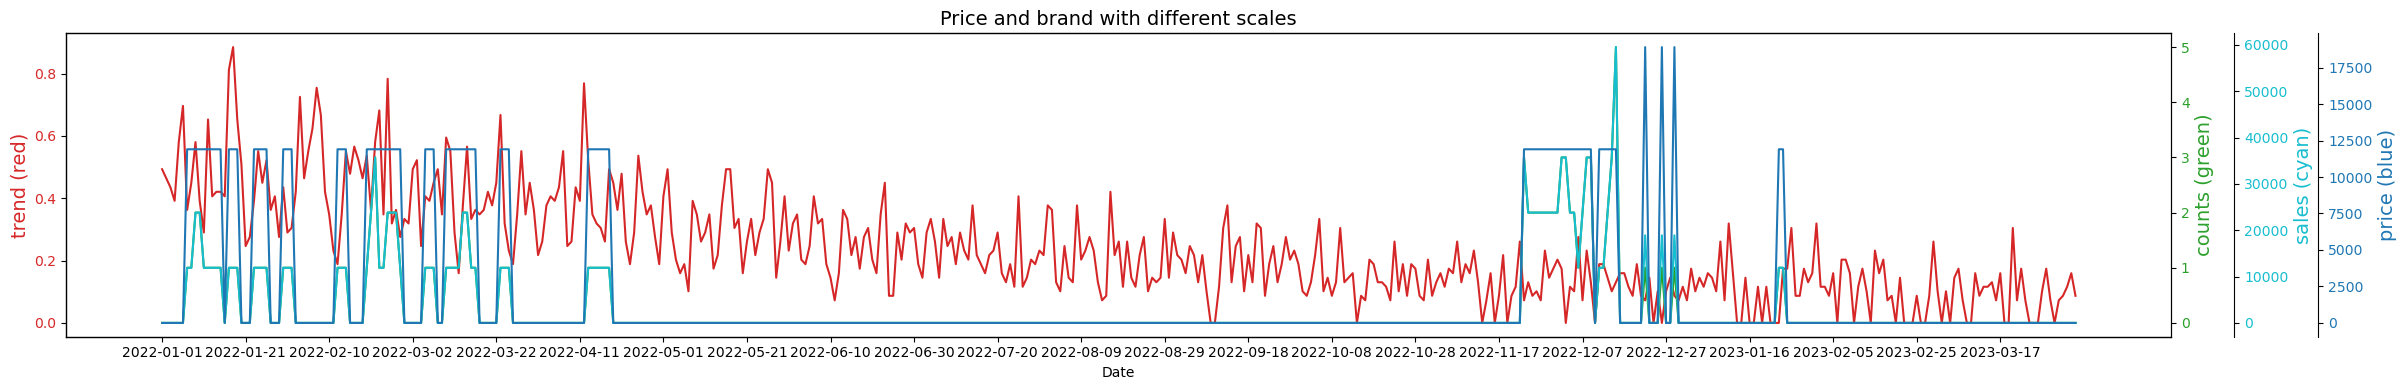

In [39]:
fig, ax1 = plt.subplots(figsize=(24,4))
color_1 = 'tab:red'
ax1.set_title('Price and brand with different scales', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_xticks(np.arange(0, len(plot_df.index)+1, 20))
ax1.set_ylabel('trend (red)', fontsize=14, color=color_1)
ax1.plot(plot_df.index, plot_df.trend, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax4 = ax1.twinx() # instantiate a second axes that shares the same x-axis

color_2 = 'tab:green'
ax2.set_ylabel('counts (green)', fontsize=14, color=color_2)
ax2.plot(plot_df.index, plot_df.counts, color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

# right side with different scale
color_3 = 'tab:cyan'
ax3.set_ylabel('sales (cyan)', fontsize=14, color=color_3)
ax3.plot(plot_df.index, plot_df.sales, color=color_3)
ax3.tick_params(axis='y', labelcolor=color_3)
ax3.spines["right"].set_position(("axes", 1.03))

# right side with different scale
color_4 = 'tab:blue'
ax4.set_ylabel('price (blue)', fontsize=14, color=color_4)
ax4.plot(plot_df.index, plot_df.price, color=color_4)
ax4.tick_params(axis='y', labelcolor=color_4)
ax4.spines["right"].set_position(("axes", 1.07))
fig.tight_layout()
plt.show()

- price 빈 부분: 보간해서 output에 추가..?

In [40]:
corr = plot_df.corr(method='pearson')

<Axes: >

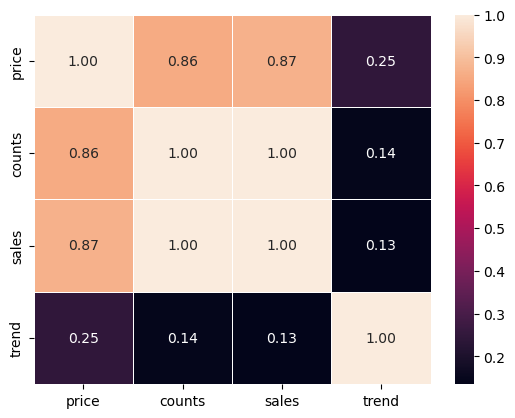

In [41]:
import seaborn as sb
sb.heatmap(data = plot_df.corr(), annot=True, fmt = '.2f', linewidths=.5)

#### 본품/리필

In [42]:
cat = pd.read_csv('./train_category/B002-C003-0015.csv')

In [43]:
group = cat.groupby('제품특성')
group_size = group.size().to_numpy()
# print(group_size)
print(group_size[group_size>1])
print(np.where(group_size>1))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(array([ 18,  49, 136, 167, 180, 205, 234, 249, 253, 255, 260, 262, 289,
       297]),)


In [44]:
cat[cat['제품특성'].str.contains("본품|리필")] # 구분해서 입력으로 넣어주기 쉬울 듯, 리필이 없는 건 그냥 본품으로

,제품,제품특성,ID,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-01206-00001,종류:유아얼룩제거제 형태:스프레이형 구성:본품 용량:500ml :1개 500g,5004,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-01206,0,0,0,...,0,0,0,4,4,6,3,4,5,6
1,B002-02903-00001,형태:액상형 구성:본품 용량:8000ml(g) :1개 8L,12211,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,1,1,2,...,0,0,0,6,7,1,14,9,23,14
2,B002-02903-00002,형태:액상형 구성:리필 용량:2000ml(g) :1개 2L,12212,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,4,6,6,...,0,0,0,0,1,1,0,0,0,0
3,B002-02903-00003,"형태:액상형 구성:리필 용량:2000ml(g) :1개, 구성:본품 용량:2200ml...",12213,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,0,0,0,...,0,0,0,5,4,2,7,4,7,6
4,B002-02903-00004,"세탁기유형:일반,드럼겸용 형태:시트형 구성:본품 :1개, 형태:액상형 구성:본품 용...",12214,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,B002-03428-00001,"세탁기유형:일반,드럼겸용 형태:캡슐형 구성:리필 성분:무형광증백제 성분:무미세플라스...",14558,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-03428,0,0,0,...,0,0,0,1,0,4,5,9,8,4
343,B002-00391-00001,"세탁기유형:일반,드럼겸용 형태:캡슐형 성분:무형광증백제 성분:무색소 :1개, 세탁기...",1552,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-00391,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,B002-02043-00001,형태:액상형 구성:본품 용량:2000ml(g) :1개 2L,8495,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02043,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,B002-01371-00013,"세탁기유형:일반,드럼겸용 형태:캡슐형 구성:본품+리필 특징:고농축 특징:향균효과 성...",5588,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-01371,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
cat[cat['제품특성'].str.contains("제품용량|총 섭취량|포|캡슐|정|g|ml|L|mg|cm|m")] # 구분?????

,제품,제품특성,ID,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-01206-00001,종류:유아얼룩제거제 형태:스프레이형 구성:본품 용량:500ml :1개 500g,5004,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-01206,0,0,0,...,0,0,0,4,4,6,3,4,5,6
1,B002-02903-00001,형태:액상형 구성:본품 용량:8000ml(g) :1개 8L,12211,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,1,1,2,...,0,0,0,6,7,1,14,9,23,14
2,B002-02903-00002,형태:액상형 구성:리필 용량:2000ml(g) :1개 2L,12212,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,4,6,6,...,0,0,0,0,1,1,0,0,0,0
3,B002-02903-00003,"형태:액상형 구성:리필 용량:2000ml(g) :1개, 구성:본품 용량:2200ml...",12213,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,0,0,0,...,0,0,0,5,4,2,7,4,7,6
4,B002-02903-00004,"세탁기유형:일반,드럼겸용 형태:시트형 구성:본품 :1개, 형태:액상형 구성:본품 용...",12214,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02903,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,B002-00391-00001,"세탁기유형:일반,드럼겸용 형태:캡슐형 성분:무형광증백제 성분:무색소 :1개, 세탁기...",1552,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-00391,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,B002-02043-00001,형태:액상형 구성:본품 용량:2000ml(g) :1개 2L,8495,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-02043,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,B002-01371-00013,"세탁기유형:일반,드럼겸용 형태:캡슐형 구성:본품+리필 특징:고농축 특징:향균효과 성...",5588,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-01371,0,0,0,...,0,0,0,0,0,0,0,0,0,1
346,B002-01063-00044,"세탁기유형형태구성용량특징:일반세탁용, 세탁기유형형태구성용량특징:일반세탁용, 세탁기유...",4462,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-01063,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 같은 소분류에서 ID가 같은 제품 수는 하나도 없었다.
- 제품 특성이 같은 수는 꽤 있다.

In [46]:
for i in range(53):
    # print(i+1)
    cat = pd.read_csv('./train_category/B002-C003-%0.4d.csv'%(i+1))
    # print('본품:', cat['제품특성'].str.contains('본품').value_counts(normalize=True))
    # print('리필:', cat['제품특성'].str.contains('리필').value_counts(normalize=True))
    # print('제품용량:', cat['제품특성'].str.contains('제품용량').value_counts(normalize=True))
    # print('총 섭취량:', cat['제품특성'].str.contains('총 섭취량').value_counts(normalize=True))
    group = cat.groupby('제품특성')
    group_size = group.size().to_numpy()
    # print(group_size[group_size>1])
    print(len(group_size[group_size>1]), end=' ')

8 5 21 2 1 0 0 0 1 1 4 3 2 6 14 6 7 0 2 1 4 8 22 0 23 1 10 5 3 7 0 6 1 10 5 15 0 8 16 5 6 1 1 3 3 3 2 5 2 0 1 26 6 